In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
X_train = train_data.iloc[:,1:-1]
Y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,1:]
test_ids = test_data.iloc[:,0]
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [4]:
X_train['person_home_ownership'] = X_train['person_home_ownership'].factorize()[0]
X_train['loan_intent'] = X_train['loan_intent'].factorize()[0]
X_train['loan_grade'] = X_train['loan_grade'].factorize()[0]
X_train['cb_person_default_on_file'] = X_train['cb_person_default_on_file'].factorize()[0]

X_test['person_home_ownership'] = X_test['person_home_ownership'].factorize()[0]
X_test['loan_intent'] = X_test['loan_intent'].factorize()[0]
X_test['loan_grade'] = X_test['loan_grade'].factorize()[0]
X_test['cb_person_default_on_file'] = X_test['cb_person_default_on_file'].factorize()[0]

X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,0,0.0,0,0,6000,11.49,0.17,0,14
1,22,56000,1,6.0,1,1,4000,13.35,0.07,0,2
2,29,28800,1,8.0,2,2,6000,8.90,0.21,0,10
3,30,70000,0,14.0,3,0,12000,11.11,0.17,0,5
4,22,60000,0,2.0,1,2,6000,6.92,0.10,0,3


In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5]

array([[0.16504854, 0.01624644, 0.        , 0.        , 0.        ,
        0.        , 0.15942029, 0.34101124, 0.20481928, 0.        ,
        0.42857143],
       [0.01941748, 0.02732356, 0.33333333, 0.04878049, 0.2       ,
        0.16666667, 0.10144928, 0.44550562, 0.08433735, 0.        ,
        0.        ],
       [0.08737864, 0.01297605, 0.33333333, 0.06504065, 0.4       ,
        0.33333333, 0.15942029, 0.19550562, 0.25301205, 0.        ,
        0.28571429],
       [0.09708738, 0.0347083 , 0.        , 0.11382114, 0.6       ,
        0.        , 0.33333333, 0.31966292, 0.20481928, 0.        ,
        0.10714286],
       [0.01941748, 0.02943348, 0.        , 0.01626016, 0.2       ,
        0.33333333, 0.15942029, 0.08426966, 0.12048193, 0.        ,
        0.03571429]])

In [6]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(46916, 11) (46916,) (11729, 11) (11729,)


In [14]:
model = Sequential([
    Dense(11, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=10, verbose=1, min_lr=0.001)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, batch_size=64, verbose=1, callbacks=[reduce_lr])

Epoch 1/500
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - accuracy: 0.8667 - loss: 0.3851 - val_accuracy: 0.9088 - val_loss: 0.2464 - learning_rate: 0.0010
Epoch 2/500
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.9085 - loss: 0.2453 - val_accuracy: 0.9194 - val_loss: 0.2251 - learning_rate: 0.0010
Epoch 3/500
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.9163 - loss: 0.2276 - val_accuracy: 0.9239 - val_loss: 0.2206 - learning_rate: 0.0010
Epoch 4/500
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.9203 - loss: 0.2235 - val_accuracy: 0.9245 - val_loss: 0.2174 - learning_rate: 0.0010
Epoch 5/500
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.9209 - loss: 0.2254 - val_accuracy: 0.9263 - val_loss: 0.2178 - learning_rate: 0.0010
Epoch 6/500
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.9191 - loss: 0.2287 - val_accuracy: 0.9257 - val_loss: 0.2160 - learning_rate: 0.0010
Epoch 7/500
734/734 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.9

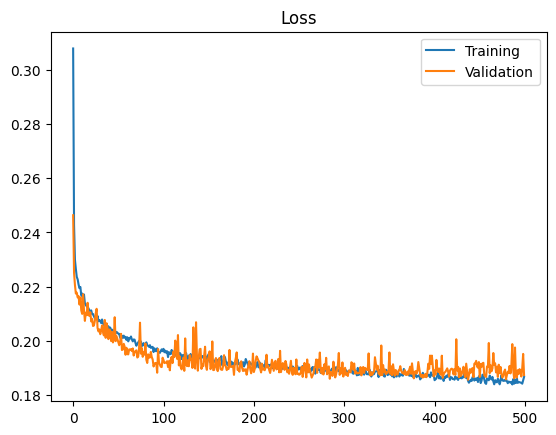

In [16]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()

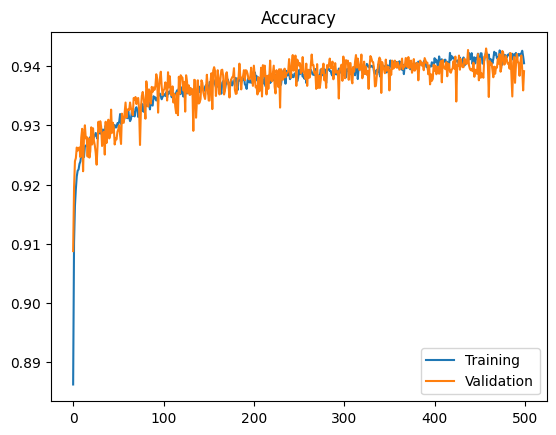

In [17]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()

In [18]:
pred = model.predict(X_test)
pred = [p.item() for p in pred]

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


In [21]:
submission = pd.DataFrame({'id':test_ids, 'loan_status':pred})
submission.to_csv('submission.csv',index=False)